In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df=pd.read_parquet(r"E:\QClairvoyance_Qunatum_Pvt_Ltd\Courses\Time Series Analysis\repo\data\cdc_monthly_regional_air_temp_D.parquet")
df

,Datum,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland
0,1881-01-01,-5.54,-5.56,-4.89,-6.51,-5.68,-5.07,-4.55,-4.55,-4.21,-4.49,-4.06,-4.15,-6.22,-5.89,-6.28,-6.76,-5.36
1,1881-02-01,-1.00,-1.01,1.33,-0.73,0.75,-2.01,-0.05,-0.07,1.64,1.45,-1.81,2.25,-0.92,-0.42,-0.34,-0.25,-0.10
2,1881-03-01,1.71,1.70,4.42,2.50,3.43,0.40,2.20,2.19,3.81,4.49,0.54,5.37,1.79,2.20,2.18,2.14,2.61
3,1881-04-01,5.56,5.55,6.63,5.01,5.88,4.63,5.64,5.64,6.44,6.65,5.02,7.08,4.41,5.51,5.04,4.43,5.55
4,1881-05-01,12.85,12.83,11.44,10.99,12.15,11.58,12.03,12.03,12.55,12.25,11.16,12.38,11.49,12.57,12.05,11.40,11.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2025-04-01,11.29,11.27,10.18,10.18,10.55,10.30,10.57,10.57,11.00,10.88,9.71,11.19,10.34,10.97,10.49,9.87,10.50
1732,2025-05-01,12.93,12.91,12.95,12.24,13.12,12.21,13.06,13.06,13.57,13.77,12.38,14.13,12.10,13.14,12.71,12.15,12.80
1733,2025-06-01,18.72,18.70,19.41,18.86,18.51,17.08,17.53,17.52,18.33,19.20,16.36,19.72,18.41,18.60,18.36,18.03,18.38
1734,2025-07-01,19.13,19.12,18.03,17.79,18.31,18.56,18.42,18.43,18.50,18.58,18.27,18.87,18.34,19.04,18.60,18.03,18.35


## 1. Line Plots of Time Series

In [5]:
df=df.set_index('Datum')

for col in df.columns:
    df[col]=df[col].astype(float)
bb_ser=df['Brandenburg/Berlin']
sns.set_theme(style='whitegrid')

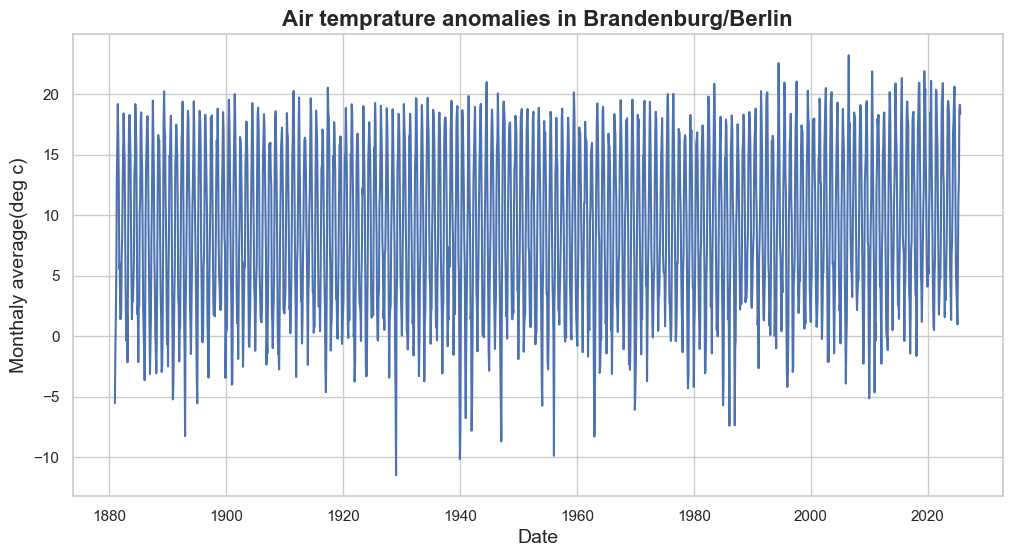

In [7]:
# Create the plot
plt.figure(figsize=(12,6))
ax=sns.lineplot(bb_ser)

#Add title and labels
plt.title("Air temprature anomalies in Brandenburg/Berlin", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Monthaly average(deg c)", fontsize=14)

plt.show()

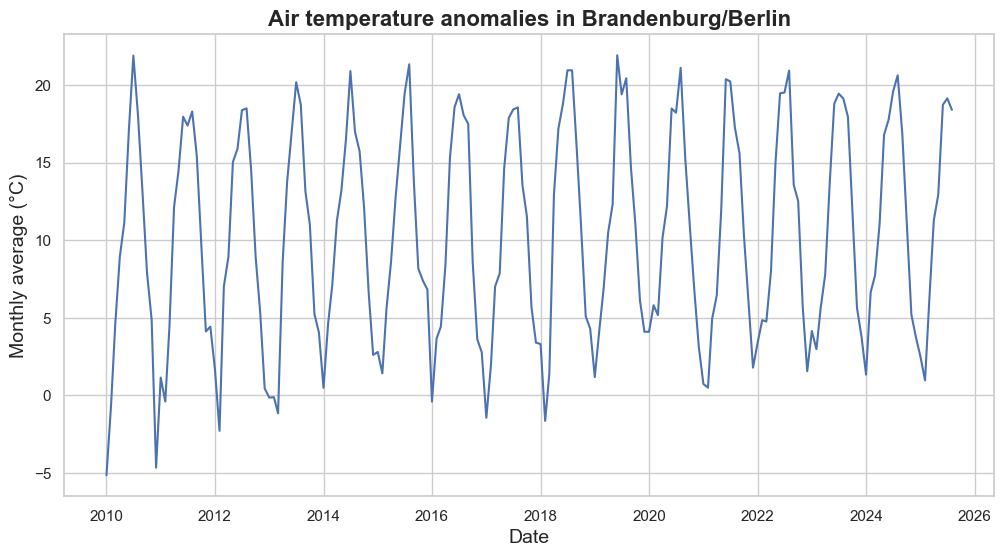

In [9]:
# To check the patterns
plt.figure(figsize=(12,6))
ax=sns.lineplot(bb_ser["2010":])

# Add title and labels
plt.title("Air temperature anomalies in Brandenburg/Berlin", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Monthly average (°C)", fontsize=14)


# Show plot
plt.show()


## 2. Using Rolling windows and confidence intervals 
When analyzing time series data, short-term fluctuations can make it difficult to see overall patterns. Rolling windows help by smoothing the data, calculating statistics (mean, median, std, etc.) over a moving window.

This can be combined with confidence intervals to visualize the uncertainty around the smoothed estimate.

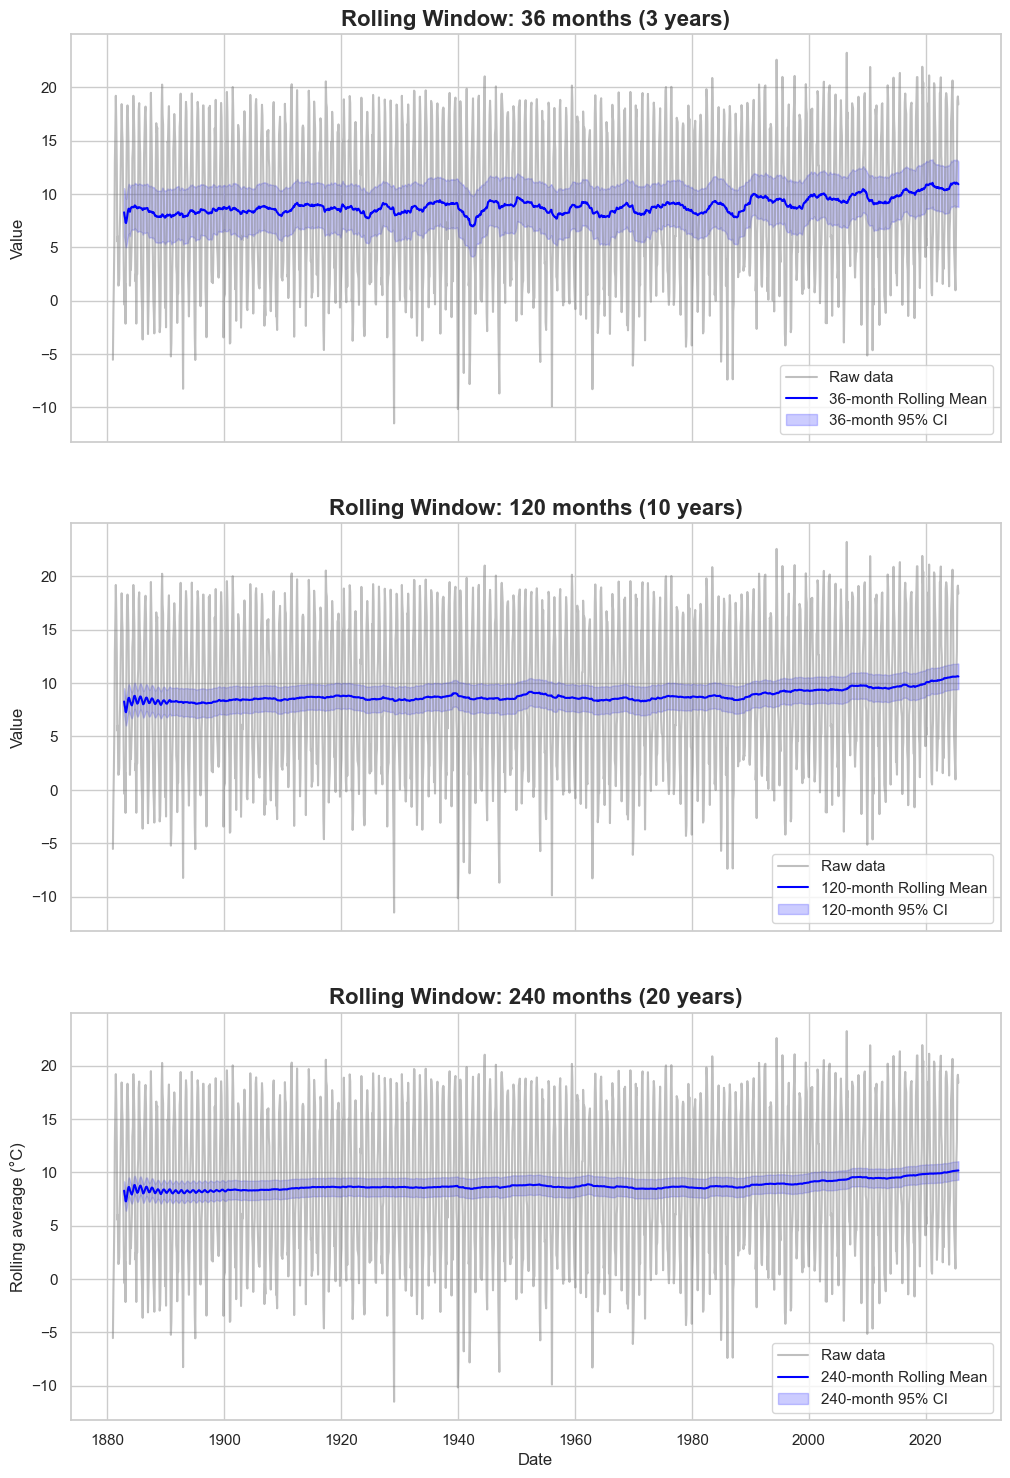

In [10]:
# Try are going to try different rolling windows to see trend
windows = [36, 120, 240]  # in months

# Explore

fig, axes = plt.subplots(len(windows), 1, figsize=(12, 6 * len(windows)), sharex=True)

for i, window in enumerate(windows):
    rolling_mean = bb_ser.rolling(window=window, min_periods=24).mean()
    rolling_std = bb_ser.rolling(window=window, min_periods=24).std()
    se = rolling_std / np.sqrt(window)
    ci_upper = rolling_mean + 1.96 * se
    ci_lower = rolling_mean - 1.96 * se


    axes[i].plot(bb_ser, color="gray", alpha=0.5, label="Raw data")
    axes[i].plot(bb_ser.index, rolling_mean, color="blue", label=f"{window}-month Rolling Mean")
    axes[i].fill_between(bb_ser.index, ci_lower, ci_upper, color="blue", alpha=0.2, label=f"{window}-month 95% CI")
    axes[i].set_title(f"Rolling Window: {window} months ({int(window/12)} years)", fontsize=16, fontweight="bold")
    axes[i].set_ylabel("Value")
    axes[i].legend()


plt.xlabel("Date")
plt.ylabel("Rolling average (°C)")
plt.legend()
plt.show()


##  3. Seasonal plot lines, Box and Violin lines

When working with time series data, it’s often useful to explore patterns over time beyond simple line plots. Seasonal plots, box plots, and violin plots can help uncover trends, seasonal variations, and the distribution of values.

#### Seasonal Plots :

A seasonal plot visualizes the values of a time series grouped by a repeating period, such as months or weekdays. This helps to identify seasonal patterns.

In [11]:
bb_ser.index.year

Index([1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881,
       ...
       2024, 2024, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='Datum', length=1736)

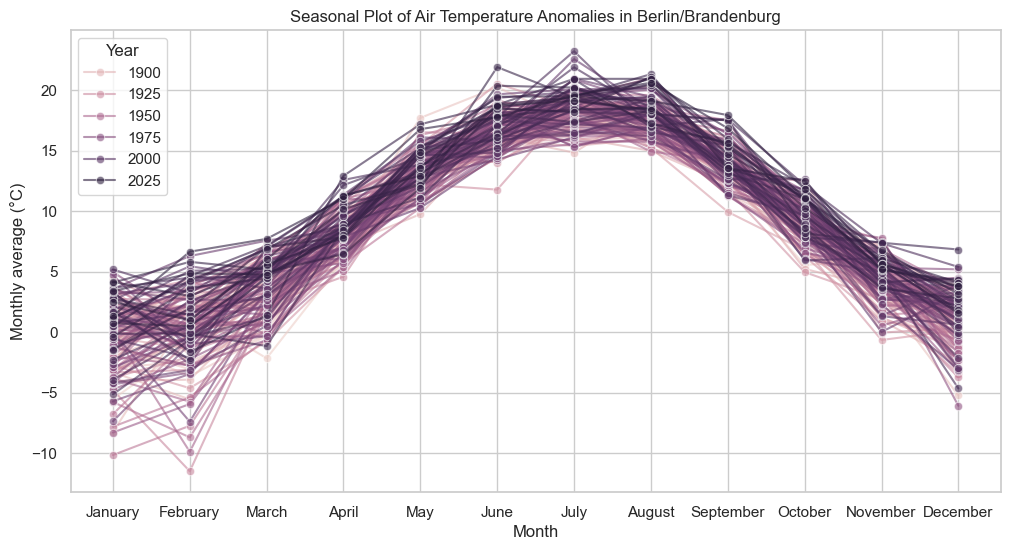

In [13]:
# Seasonal plot using seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x=bb_ser.index.month_name(), y=bb_ser, hue=bb_ser.index.year, marker='o', alpha = 0.6)

plt.xlabel('Month')
plt.ylabel('Monthly average (°C)')
plt.title('Seasonal Plot of Air Temperature Anomalies in Berlin/Brandenburg')
plt.legend(title='Year', loc='upper left')
plt.show()

#### 4. Box Plot:

Seaborn’s boxplot is perfect for summarizing monthly distributions and we can already see some outliers:

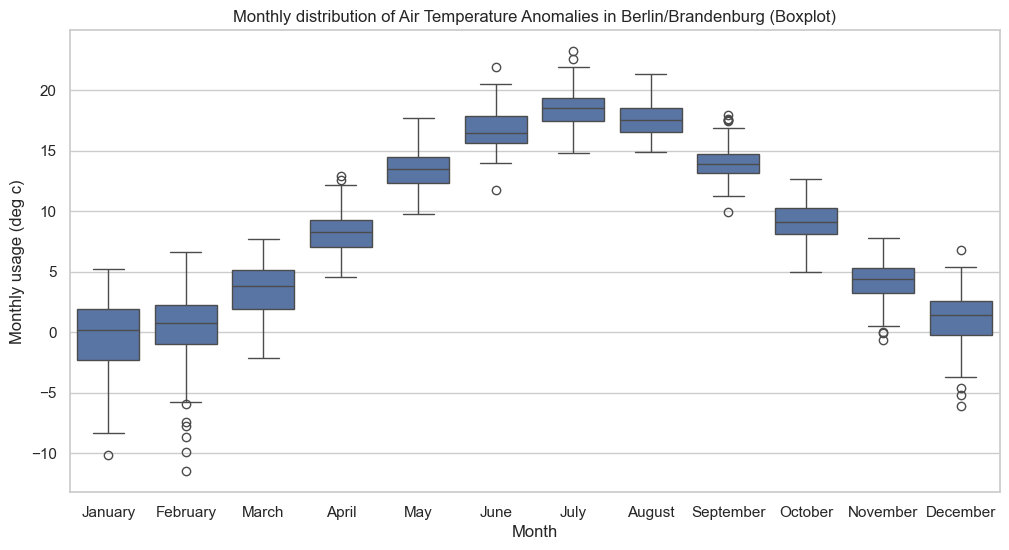

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x=bb_ser.index.month_name(), y=bb_ser)

plt.xlabel("Month")
plt.ylabel("Monthly usage (deg c)")
plt.title("Monthly distribution of Air Temperature Anomalies in Berlin/Brandenburg (Boxplot)")
plt.show()

### 5. Violin Plot
Seaborn’s violinplot shows the full distribution for each month:

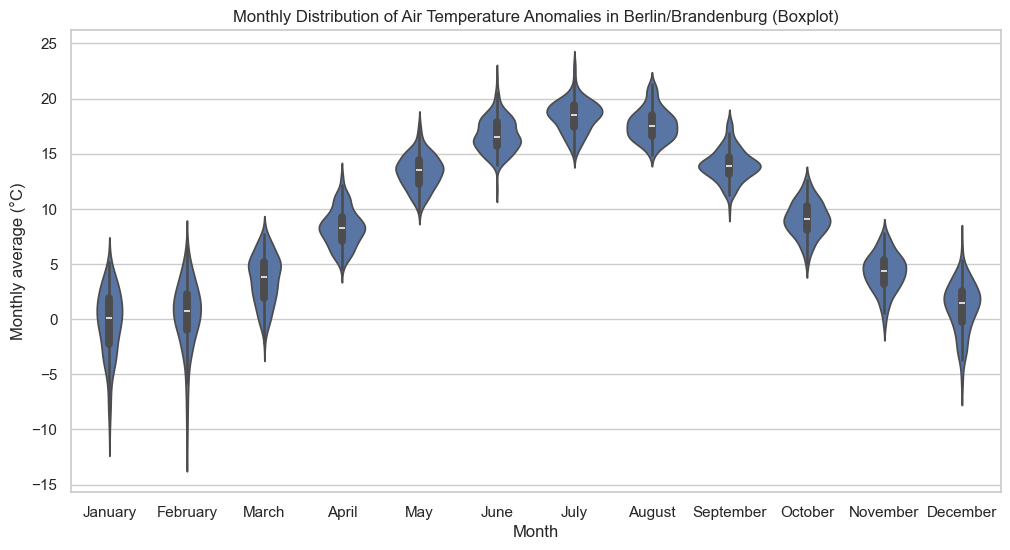

In [15]:
plt.figure(figsize=(12,6))

sns.violinplot(x=bb_ser.index.month_name(), y=bb_ser)

plt.xlabel('Month')
plt.ylabel('Monthly average (°C)')
plt.title('Monthly Distribution of Air Temperature Anomalies in Berlin/Brandenburg (Boxplot)')
plt.show()

### 6. Polar plot and heat maps
Polar plots are ideal for visualizing cyclical data such as monthly or daily trends in a circular layout.

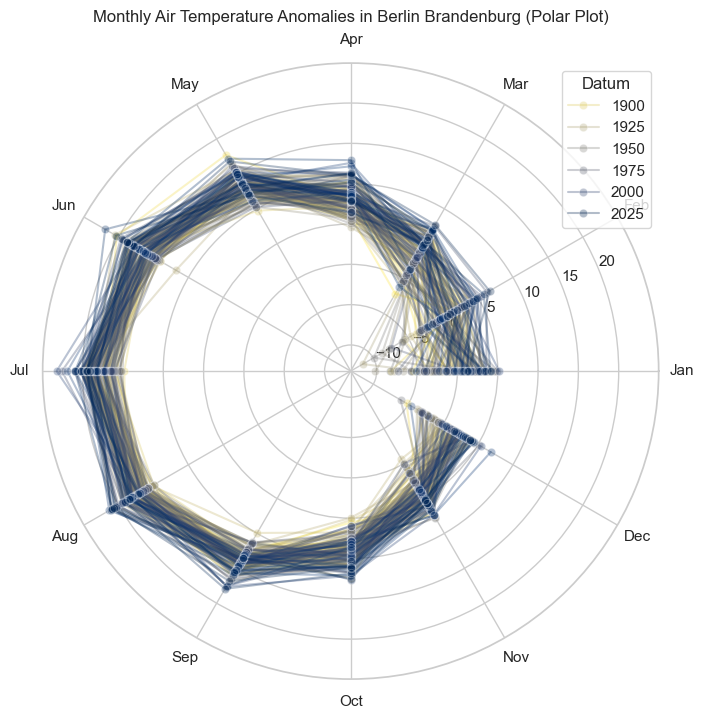

In [16]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

sns.lineplot(x= (2 * np.pi * (bb_ser.index.month-1)/12), y=bb_ser, marker='o', linestyle='-', hue=bb_ser.index.year, palette="cividis_r", alpha=0.3, ax=ax)

ax.set_xticks(2 * np.pi * (bb_ser.index.month.unique()-1)/12)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_title('Monthly Air Temperature Anomalies in Berlin Brandenburg (Polar Plot)', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.show()

# 7. Heat maps
Heat maps show the intensity of values across two dimensions, such as month vs year, making patterns easy to spot.

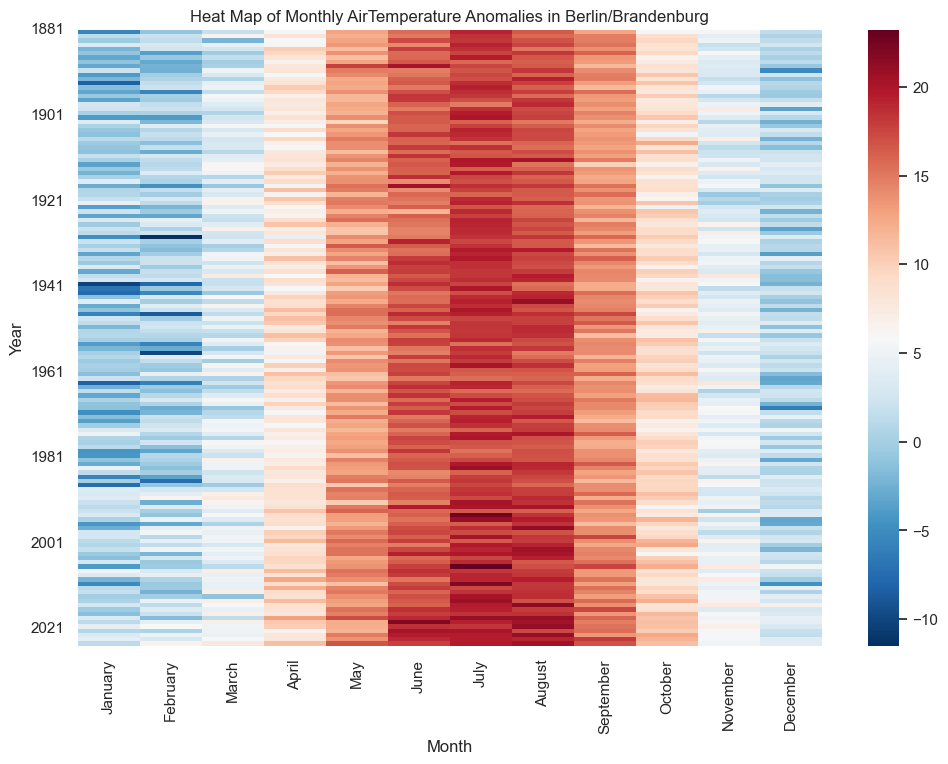

In [17]:
# Pivot data for heat map: months as columns, years as rows
bb_df = pd.DataFrame([bb_ser.index.month, bb_ser.index.year, bb_ser]).T
bb_df.columns = ['Month', 'Year', 'Value']
heatmap_data = bb_df.pivot(columns='Month', index='Year', values='Value')[:'2025']
heatmap_data.columns = bb_ser.index.month_name().unique()

plt.figure(figsize=(12,8))

sns.heatmap(heatmap_data, annot=False, cmap='RdBu_r')

years = np.arange(1881, 2024)
yticks = np.arange(0, len(years), 20)  # positions
ytick_labels = years[yticks] 

plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(yticks, ytick_labels)
plt.title('Heat Map of Monthly AirTemperature Anomalies in Berlin/Brandenburg')
plt.show()

### 8. Autocorrelation and Partial Autocorrelation
Autocorrelation (ACF) measures how correlated a time series is with its past values at different lags. Partial autocorrelation (PACF) isolates the effect of each lag. These plots are essential for identifying patterns and selecting model parameters in ARIMA or other statistical methods.

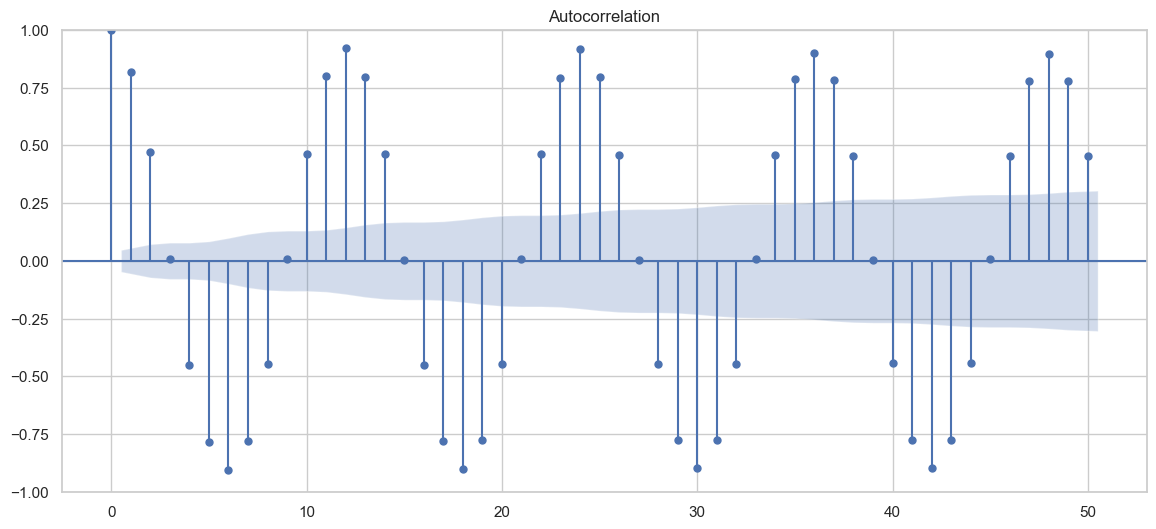

In [18]:
fig = plot_acf(bb_ser, lags=50)
fig.set_size_inches(14, 6)
plt.show()

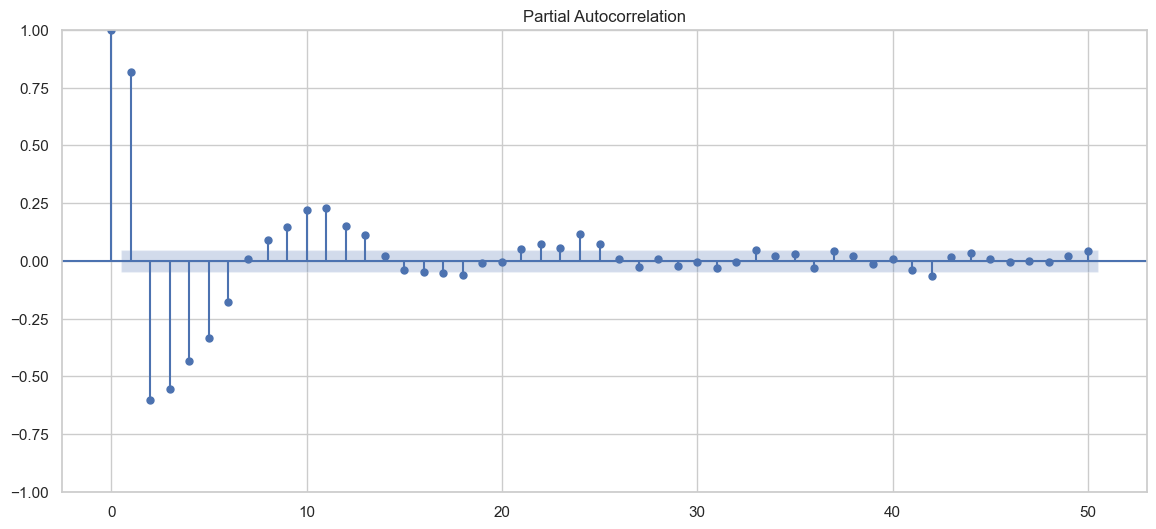

In [19]:
fig = plot_pacf(bb_ser, lags=50)
fig.set_size_inches(14, 6)
plt.show()